In [111]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

In [112]:
# Suppress warnings
warnings.filterwarnings("ignore")

## Read Pre processed Data

In [113]:
data = pd.read_csv('cleanDF.csv')
colombo_df = data[data['Location'] == "Colombo Proper"]
colombo_df.set_index('Current Date', inplace=True)
jaffna_df = data[data['Location'] == "Jaffna Proper"]
jaffna_df.set_index('Current Date', inplace=True)
deniyaya_df = data[data['Location'] == "Deniyaya, Matara"]
deniyaya_df.set_index('Current Date', inplace=True)
nuwaraEliya_df = data[data['Location'] == "Nuwara Eliya Proper"]
nuwaraEliya_df.set_index('Current Date', inplace=True)
kandy_df = data[data['Location'] == "Kandy Proper"]
kandy_df.set_index('Current Date', inplace=True)
bibile_df = data[data['Location'] == "Bibile, Monaragala"]
bibile_df.set_index('Current Date', inplace=True)
kurunegala_df = data[data['Location'] == "Kurunegala Proper"]
kurunegala_df.set_index('Current Date', inplace=True)

## Identifying Seasonality in Time Series Data: Selecting ARIMA or SARIMA

let's get one dataframe and calculate both rmse values and plot the forecast values. After that, we can get a conclusion to see which model will be good for the training.

In [114]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(colombo_df) * split_ratio)
train_data, test_data = colombo_df[0:train_size], colombo_df[train_size:]
train_data.shape

(1430, 2)

In [115]:
# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1)) 
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using Arima model: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Evaluation metrics using Arima model: 

RMSE: 0.00010004448798718372
MSE: 1.0008899576617748e-08
MAPE: 146.19576770108415


<Axes: title={'center': 'Forecasted Results in Colombo using Arima Model'}, xlabel='Current Date', ylabel='HCHO Level'>

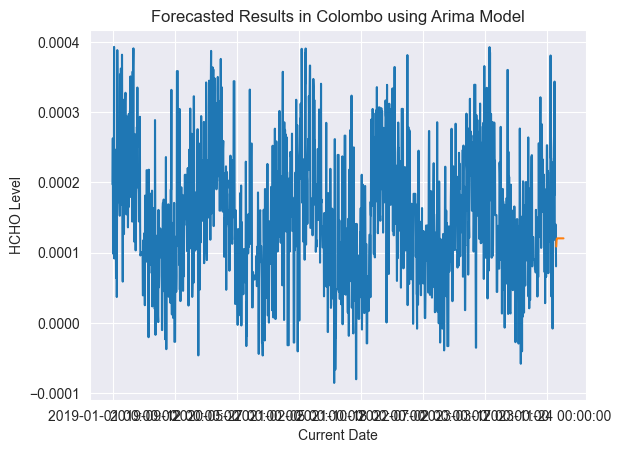

In [116]:
model = ARIMA(colombo_df["HCHO reading"], order=(1, 1, 1))
arima_result = model.fit()
# Generating forecast
forecast = arima_result.forecast(steps=30)

plt.title("Forecasted Results in Colombo using Arima Model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
colombo_df["HCHO reading"].plot()
forecast.plot()

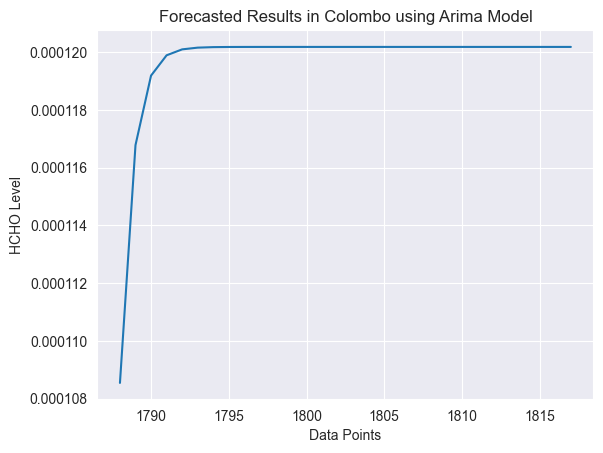

In [117]:
# Forecasted Results
plt.title("Forecasted Results in Colombo using Arima Model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)

In [118]:
# Define and fit the S-ARIMA model on training data
sarima_model = SARIMAX(train_data['HCHO reading'][:1429], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using S-Arima model: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Evaluation metrics using S-Arima model: 

RMSE: 0.00010004448798718372
MSE: 1.0008899576617748e-08
MAPE: 146.19576770108415


<Axes: title={'center': 'Prediction Results in Colombo using S-Arima Model'}, xlabel='Current Date', ylabel='HCHO Level'>

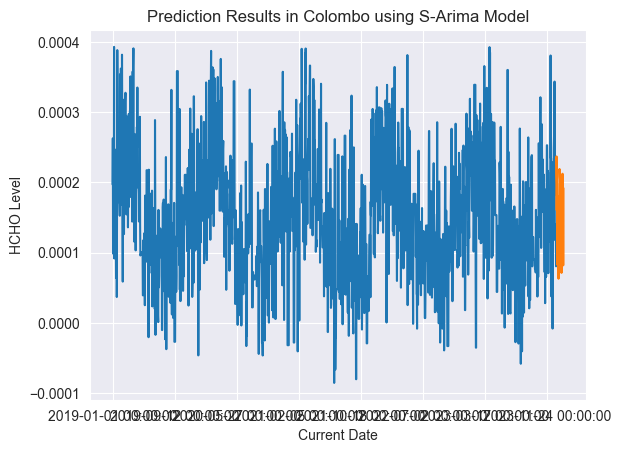

In [119]:
sarima_model = SARIMAX(colombo_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Adjusting optimization parameters
sarima_result = sarima_model.fit()
# Generating forecast
forecast = sarima_result.forecast(steps=30)
plt.title("Prediction Results in Colombo using S-Arima Model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
colombo_df["HCHO reading"].plot()
forecast.plot()

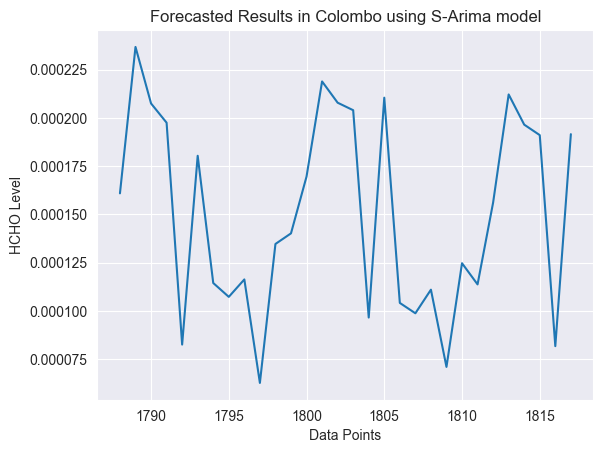

In [120]:
# Forecasted Results
plt.title("Forecasted Results in Colombo using S-Arima model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)

## Evaluating S-ARIMA Model Performance Across Multiple Cities for HCHO Forecasting

In [121]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(colombo_df) * split_ratio)
train_data, test_data = colombo_df[0:train_size], colombo_df[train_size:]
colombo_shape = train_data.shape
colombo_shape

(1430, 2)

In [122]:
# Define and fit the S-ARIMA model on training data
model = SARIMAX(colombo_df["HCHO reading"][:1429], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using S-Arima model for Colombo dataframe: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Evaluation metrics using S-Arima model for Colombo dataframe: 

RMSE: 0.00041893674419326356
MSE: 1.7550799563525197e-07
MAPE: 502.4678489537278


In [123]:
split_ratio = 0.8
train_size = int(len(kandy_df) * split_ratio)
train_data, test_data = kandy_df[0:train_size], kandy_df[train_size:]
kandy_df_shape = train_data.shape
kandy_df_shape

(1428, 2)

In [124]:
# Define and fit the S-ARIMA model on training data
model = SARIMAX(kandy_df["HCHO reading"][0:1428], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using S-Arima model for Kandy dataframe: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)


Evaluation metrics using S-Arima model for Kandy dataframe: 

RMSE: 0.000932836746246509
MSE: 8.701843951477738e-07
MAPE: 2400.58378058083


In [125]:
split_ratio = 0.8
train_size = int(len(nuwaraEliya_df) * split_ratio)
train_data, test_data = nuwaraEliya_df[0:train_size], nuwaraEliya_df[train_size:]
nuwaraEliya_df_shape = train_data.shape
nuwaraEliya_df_shape

(1427, 2)

In [126]:
# Define and fit the S-ARIMA model on training data
model = SARIMAX(nuwaraEliya_df["HCHO reading"][0:1427], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using S-Arima model for Nuwara Eliya dataframe: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Evaluation metrics using S-Arima model for Nuwara Eliya dataframe: 

RMSE: 0.0002490039888717508
MSE: 6.200298647404299e-08
MAPE: 534.4660143998481


In [127]:
split_ratio = 0.8
train_size = int(len(bibile_df) * split_ratio)
train_data, test_data = bibile_df[0:train_size], bibile_df[train_size:]
bibile_df_shape = train_data.shape
bibile_df_shape

(1428, 2)

In [128]:
# Define and fit the S-ARIMA model on training data
model = SARIMAX(bibile_df["HCHO reading"][0:1428], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using S-Arima model for bibile dataframe: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Evaluation metrics using S-Arima model for bibile dataframe: 

RMSE: 0.0005661083194195849
MSE: 3.204786293160668e-07
MAPE: 765.5799947050473


In [129]:
split_ratio = 0.8
train_size = int(len(deniyaya_df) * split_ratio)
train_data, test_data = deniyaya_df[0:train_size], deniyaya_df[train_size:]
deniyaya_df_shape = train_data.shape
deniyaya_df_shape

(1408, 2)

In [130]:
# Define and fit the S-ARIMA model on training data
model = SARIMAX(deniyaya_df["HCHO reading"][0:1408], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using S-Arima model for deniyaya dataframe: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Evaluation metrics using S-Arima model for deniyaya dataframe: 

RMSE: 0.00016362444387427234
MSE: 2.6772958633164904e-08
MAPE: 1891.2462853446104


In [131]:
split_ratio = 0.8
train_size = int(len(kurunegala_df) * split_ratio)
train_data, test_data = kurunegala_df[0:train_size], kurunegala_df[train_size:]
kurunegala_df_shape = train_data.shape
kurunegala_df_shape

(1420, 2)

In [132]:
# Define and fit the S-ARIMA model on training data
model = SARIMAX(kurunegala_df["HCHO reading"][0:1408], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using S-Arima model for Kurunegala dataframe: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Evaluation metrics using S-Arima model for Kurunegala dataframe: 

RMSE: 0.0004585174384098517
MSE: 2.1023824132593212e-07
MAPE: 568.2948284231803


In [133]:
split_ratio = 0.8
train_size = int(len(jaffna_df) * split_ratio)
train_data, test_data = jaffna_df[0:train_size], jaffna_df[train_size:]
jaffna_df_shape = train_data.shape
jaffna_df_shape

(1401, 2)

In [134]:
# Define and fit the S-ARIMA model on training data
model = SARIMAX(jaffna_df["HCHO reading"][0:1401], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Evaluation metrics using S-Arima model for Jaffna dataframe: \n")
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Evaluation metrics using S-Arima model for Jaffna dataframe: 

RMSE: 0.0002452005663374599
MSE: 6.012331773221107e-08
MAPE: 4319.684971889245


### S-ARIMA for Time Series Forecasting: Predicting Future HCHO Readings

<Axes: title={'center': 'Prediction Results in Colombo using S-Arima Model'}, xlabel='Current Date', ylabel='HCHO Level'>

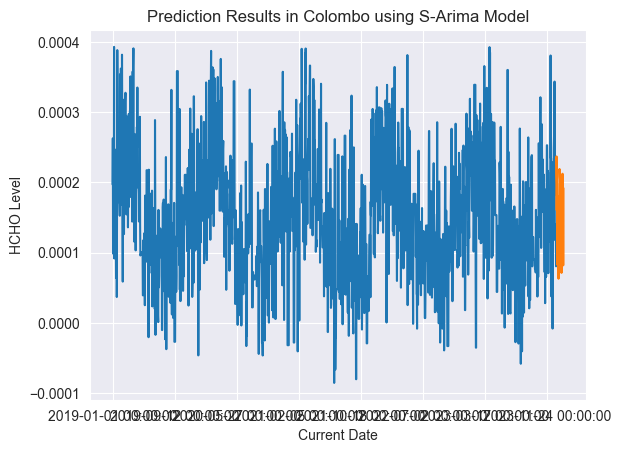

In [135]:
sarima_model = SARIMAX(colombo_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# Adjusting optimization parameters
sarima_result = sarima_model.fit()
# Generating forecast
forecast = sarima_result.forecast(steps=30)
plt.title("Prediction Results in Colombo using S-Arima Model")
plt.xlabel('Current Date')
plt.ylabel('HCHO Level')
colombo_df["HCHO reading"].plot()
forecast.plot()

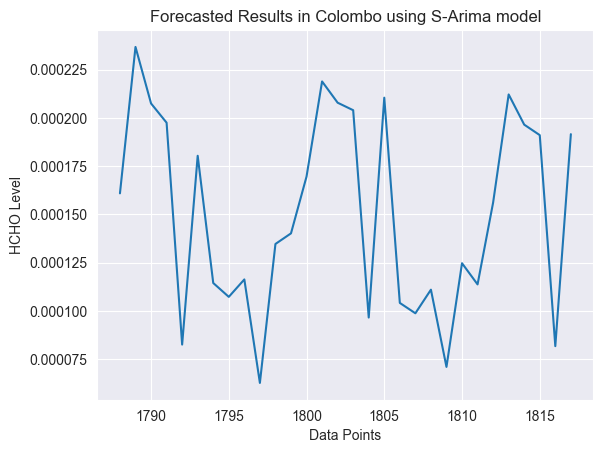

In [136]:
# Forecasted Results
plt.title("Forecasted Results in Colombo using S-Arima model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)

<Axes: title={'center': 'Prediction Results in Kandy using S-Arima Model'}, xlabel='Current Date', ylabel='HCHO Level'>

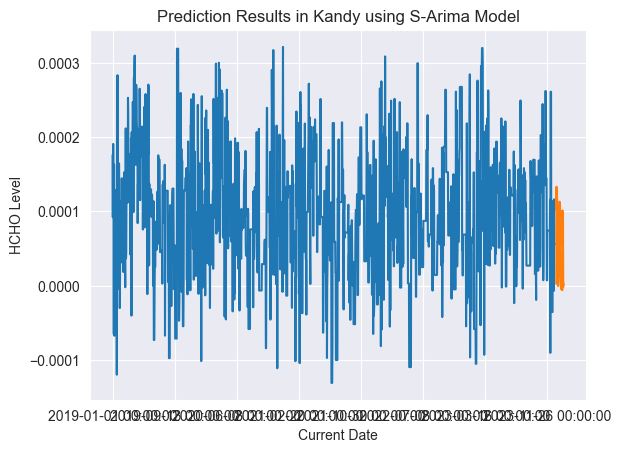

In [137]:
sarima_model = SARIMAX(kandy_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
# Generating forecast
forecast = sarima_result.forecast(steps=30)

plt.title("Prediction Results in Kandy using S-Arima Model")
plt.xlabel('Current Date')
plt.ylabel('HCHO Level')
kandy_df["HCHO reading"].plot()
forecast.plot()

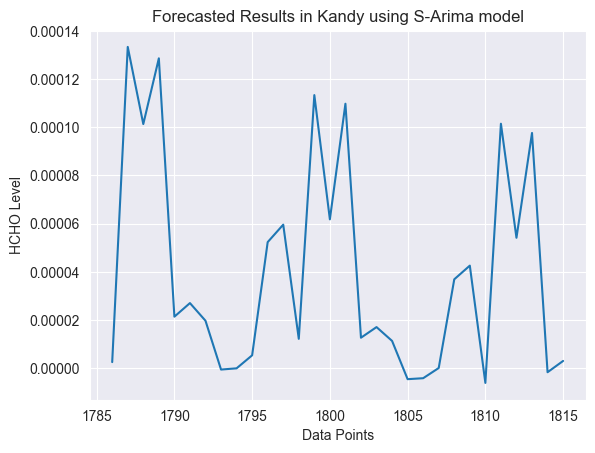

In [138]:
# Forecasted Results
plt.title("Forecasted Results in Kandy using S-Arima model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)

<Axes: title={'center': 'Prediction Results in Jaffna using S-Arima Model '}, xlabel='Current Date', ylabel='HCHO Level'>

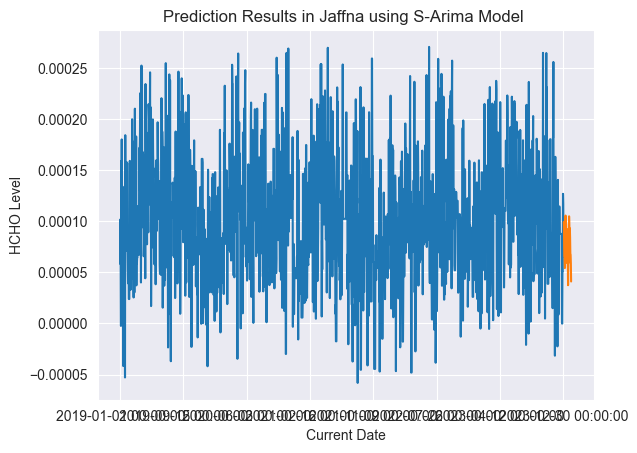

In [139]:
sarima_model = SARIMAX(jaffna_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Generating forecast
forecast = sarima_result.forecast(steps=30)

plt.title("Prediction Results in Jaffna using S-Arima Model ")
plt.xlabel('Current Date')
plt.ylabel('HCHO Level')
jaffna_df["HCHO reading"].plot()
forecast.plot()

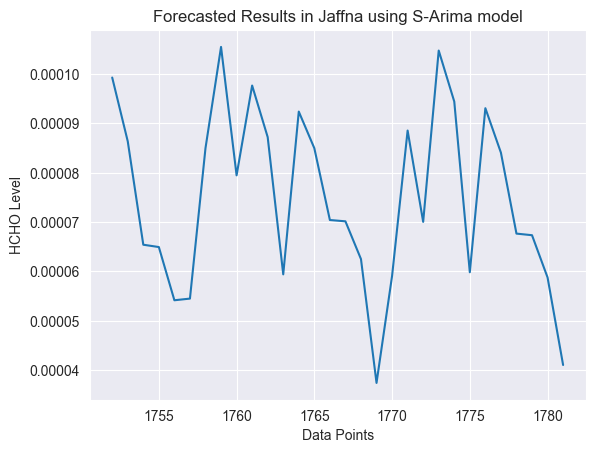

In [140]:
# Forecasted Results
plt.title("Forecasted Results in Jaffna using S-Arima model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)

<Axes: title={'center': 'Prediction Results in Deniyaya using S-Arima Model'}, xlabel='Current Date', ylabel='HCHO Level'>

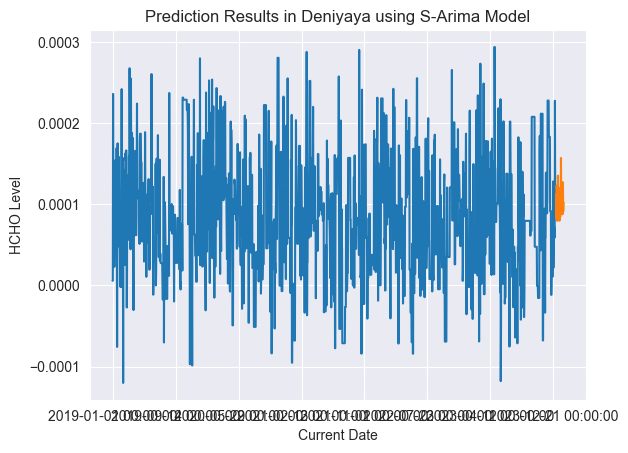

In [141]:
sarima_model = SARIMAX(deniyaya_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Generating forecast
forecast = sarima_result.forecast(steps=30)

plt.title("Prediction Results in Deniyaya using S-Arima Model")
plt.xlabel('Current Date')
plt.ylabel('HCHO Level')
deniyaya_df["HCHO reading"].plot()
forecast.plot()

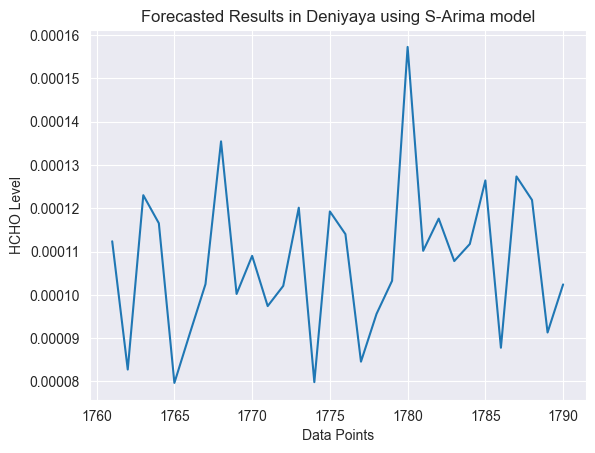

In [142]:
# Forecasted Results
plt.title("Forecasted Results in Deniyaya using S-Arima model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)

<Axes: title={'center': 'Prediction Results in Nuwara Eliya using S-Arima Model'}, xlabel='Current Date', ylabel='HCHO Level'>

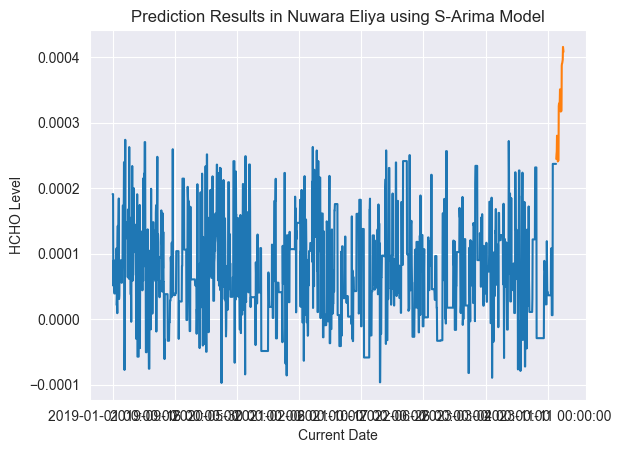

In [143]:
sarima_model = SARIMAX(nuwaraEliya_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Generating forecast
forecast = sarima_result.forecast(steps=30)

plt.title("Prediction Results in Nuwara Eliya using S-Arima Model")
plt.xlabel('Current Date')
plt.ylabel('HCHO Level')
nuwaraEliya_df["HCHO reading"].plot()
forecast.plot()

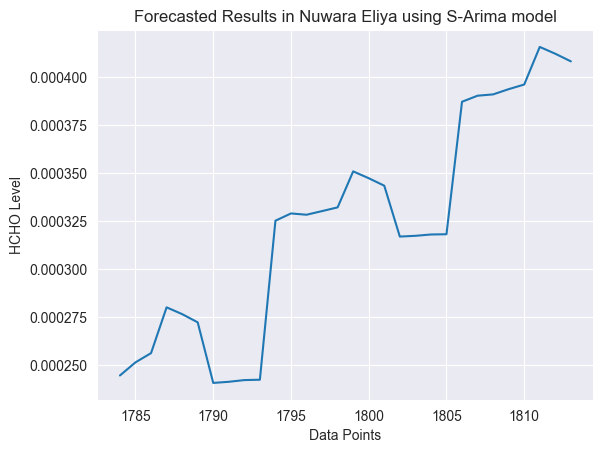

In [144]:
# Forecasted Results
plt.title("Forecasted Results in Nuwara Eliya using S-Arima model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)

<Axes: title={'center': 'Prediction Results in Kurunegala using S-Arima Model'}, xlabel='Current Date', ylabel='HCHO Level'>

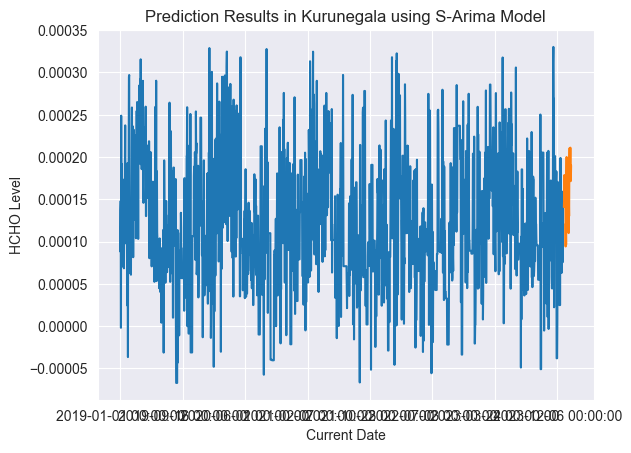

In [145]:
sarima_model = SARIMAX(kurunegala_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Generating forecast
forecast = sarima_result.forecast(steps=30)

plt.title("Prediction Results in Kurunegala using S-Arima Model")
plt.xlabel('Current Date')
plt.ylabel('HCHO Level')
kurunegala_df["HCHO reading"].plot()
forecast.plot()

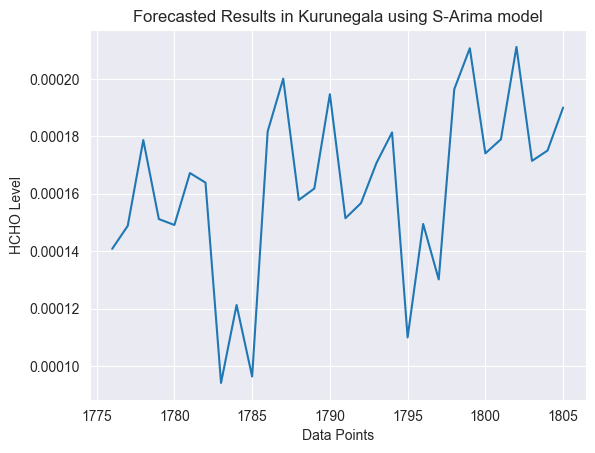

In [146]:
# Forecasted Results
plt.title("Forecasted Results in Kurunegala using S-Arima model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)

<Axes: title={'center': 'Prediction Results in Bibile using S-Arima Model'}, xlabel='Current Date', ylabel='HCHO Level'>

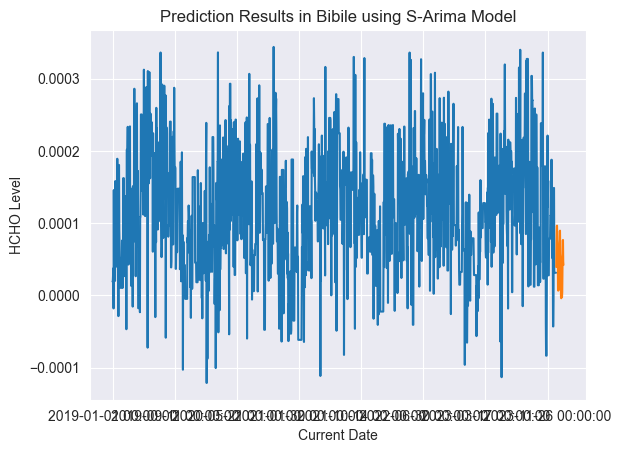

In [147]:
sarima_model = SARIMAX(bibile_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Generating forecast
forecast = sarima_result.forecast(steps=30)

plt.title("Prediction Results in Bibile using S-Arima Model")
plt.xlabel('Current Date')
plt.ylabel('HCHO Level')
bibile_df["HCHO reading"].plot()
forecast.plot()

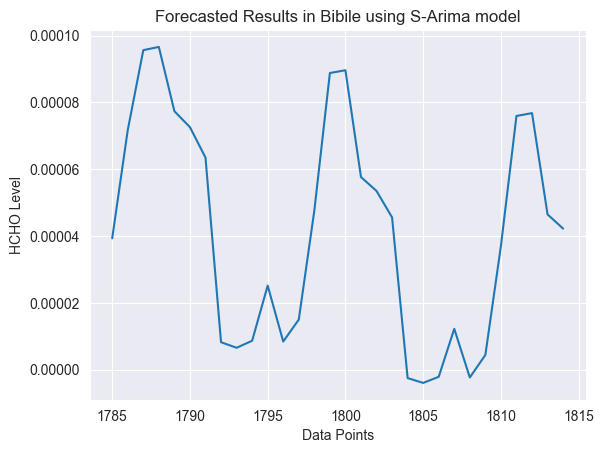

In [148]:
# Forecasted Results
plt.title("Forecasted Results in Bibile using S-Arima model")
plt.xlabel('Data Points')
plt.ylabel('HCHO Level')
plt.plot(forecast)